<a href="https://colab.research.google.com/github/sidmanu/MachineLearningScrapbook/blob/main/Swirl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

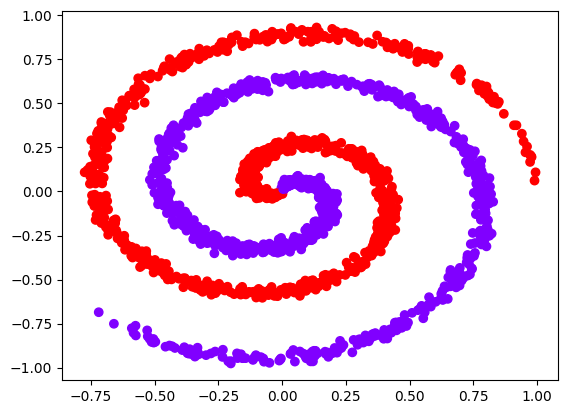

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# seperatation
def generate_spiral_data(n_points, n_classes=2, n_loops=3, offset=5):
    """ Generate n_points per class for n_classes number of spirals with n_loops number of loops """
    X = []
    y = []

    for i in range(n_classes):
        r = np.linspace(0.0, 1, n_points)  # radius
        t = (np.linspace(i * offset * n_loops, (i + 1) *
                        offset * n_loops, n_points)  + np.random.randn(n_points)) * 0.2 # theta
        X.append(np.c_[r * np.sin(t), r * np.cos(t)])
        y.append(np.ones(n_points) * i)

    X = np.concatenate(X)
    y = np.concatenate(y)
    return  np.c_[X,y]

# generate 2 spirals each with 1000 data points and 3 loops
data = generate_spiral_data(1000,  n_classes=2, n_loops=5, offset=10)
np.random.shuffle(data)

M = data[:,:2]
L = data[:,2]

# visualize data
plt.scatter(M[:, 0], M[:, 1], c=L, cmap='rainbow')
plt.show()

In [15]:
M[1]

array([-0.09281651,  0.02069232])

In [32]:
import tensorflow as tf
from collections import Counter


train = int(M.shape[0]*.80)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid', input_shape=(M.shape[1],)),
    tf.keras.layers.Dense(8, activation='sigmoid'), # don;t change the type of activiation from sigmoid
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
                                                loss='binary_crossentropy',
                                                metrics=['accuracy']) # don't chagne SGD, or loss
model.fit(M[:train], L[:train], epochs=1000, verbose=1)
pred = model.predict(M[train:])

print(Counter(zip(np.round(pred).T[0], L[train:])))

Epoch 1/1000
50/50 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.5050
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5387
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5344
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5094
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5663
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5481
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5650
Epoch 8/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5738
Epoch 9/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5769
Epoch 10/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5725